In [1]:
import numpy as np
import os
import glob
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

# 1. Corpus analysis

Let's read the current crawled corpus

In [2]:
corpus_path = './gt.txt'
raw_corpus = open(corpus_path, 'r').read()

Extract character set

In [3]:
raw_char_set = set(raw_corpus)

And remove not supported char

In [4]:
allowed_char_set_path = './data/chars/vie.txt'
allowed_char_set = open(allowed_char_set_path, 'r').read().split('\n')
allowed_char_set.append('\n')
allowed_char_set.append(' ')
print(allowed_char_set)
print('Total:', len(allowed_char_set))

['*', "'", '"', '#', '&', '(', ')', '+', '-', ',', '.', ':', ';', '/', '%', '', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'B', 'C', 'D', 'Đ', 'E', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'F', 'G', 'H', 'I', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'J', 'K', 'L', 'M', 'N', 'O', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'P', 'Q', 'R', 'S', 'T', 'U', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'V', 'W', 'X', 'Y', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Z', 'a', 'á', 'à', 'ả', 'ã', 'ạ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'b', 'c', 'd', 'đ', 'e', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'f', 'g', 'h', 'i', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'j', 'k', 'l', 'm', 'n', 'o', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'p', 'q', 'r', 's', 't', 'u', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 

In [5]:
not_allowed_char_set = [char for char in raw_char_set if char not in allowed_char_set]
print(not_allowed_char_set)
print('Total:', len(not_allowed_char_set))

['ß', 'Њ', 'ر', '–', '\uf0ed', 'ݱ', '՛', 'ڧ', '¶', '\uf0a7', '®', '̠', '̃', '۵', 'þ', '}', ']', '_', '\uf05b', '□', 'Ӿ', '„', '\uf0fc', 'م', '\uf0ea', 'Ü', '\uf0b4', '‘', '∏', '\uf074', '֬', '٭', '|', 'ɫ', 'Ż', '\uf17d', '½', 'Э', '!', '\x86', '×', 'ڬ', '…', '˘', '[', '\uf046', 'Ï', 'ÿ', 'Ñ', '♀', '—', '<', 'Ø', '\uf0fe', '\uf06d', '\uf0b7', '\uf028', 'ë', '³', '\x85', 'Ծ', 'ֵ', 'Σ', '\uf073', '֜', 'Ն', '\uf02b', 'ી', 'ʈ', 'ɋ', '．', 'Û', '\uf0e8', 'Ș', 'ټ', '̛', 'ѣ', 'λ', '֝', 'ø', 'ٛ', 'ĵ', 'θ', 'Ǣ', '́', '۴', 'Ƙ', 'ª', '¼', '•', 'ڎ', '\uf0e5', 'Ј', '۫', '»', 'ǘ', '\x7f', 'Ӣ', 'ѐ', '\uf053', 'ð', '£', 'ݾ', '˹', '\uf047', '≤', '̞', '{', 'ɴ', 'î', 'Ր', 'ǿ', 'β', '@', '¬', '̉', 'ʜ', '\uf0ec', '☕', 'Ç', '\uf0b8', '>', '´', '÷', 'Ф', '$', '\uf0f7', '¦', '\uf0f8', '\uf0e9', '\uf0f6', '\uf0fb', '\uf0fd', 'ҟ', '\uf02a', 'Я', '’', 'ӗ', '\uf070', '`', '\x91', '\uf0eb', '\uf062', 'Ë', '\uf0a3', '̀', '−', '\uf0fa', '±', 'Ð', 'ழ', '\\', 'ș', '“', '뉑', '\uf0d5', '\uf0b0', 'Ʈ', 'ï', 'Ʌ', '؇', '√', '

In [6]:
for char in tqdm(not_allowed_char_set):
    raw_corpus = raw_corpus.replace(char, '')
raw_corpus = raw_corpus.replace('  ','').replace('..','.').replace('##', '#').replace('..', '.')

100%|██████████| 259/259 [01:16<00:00,  3.42it/s]


In [7]:
raw_corpus = list(set(raw_corpus.split('\n')))
print(len(raw_corpus))

1576502


Now we calculate the character distribution

In [8]:
def count_char_freq(corpus):
    temp_corpus = '\n'.join(corpus)
    char_freq = {}
    for char in tqdm(allowed_char_set):
        char_freq[char] = temp_corpus.count(char)
    return char_freq

In [9]:
char_freq = count_char_freq(raw_corpus)

100%|██████████| 214/214 [00:15<00:00, 14.21it/s]


In [10]:
def plot_char_freq(char_freq):
    char_freq.pop(' ', None)
    char_freq.pop('\n', None)
    char_freq.pop('', None)
    
    plt.figure(figsize=(30,20)) 
    plt.bar([k for k in char_freq],[v for v in char_freq.values()])

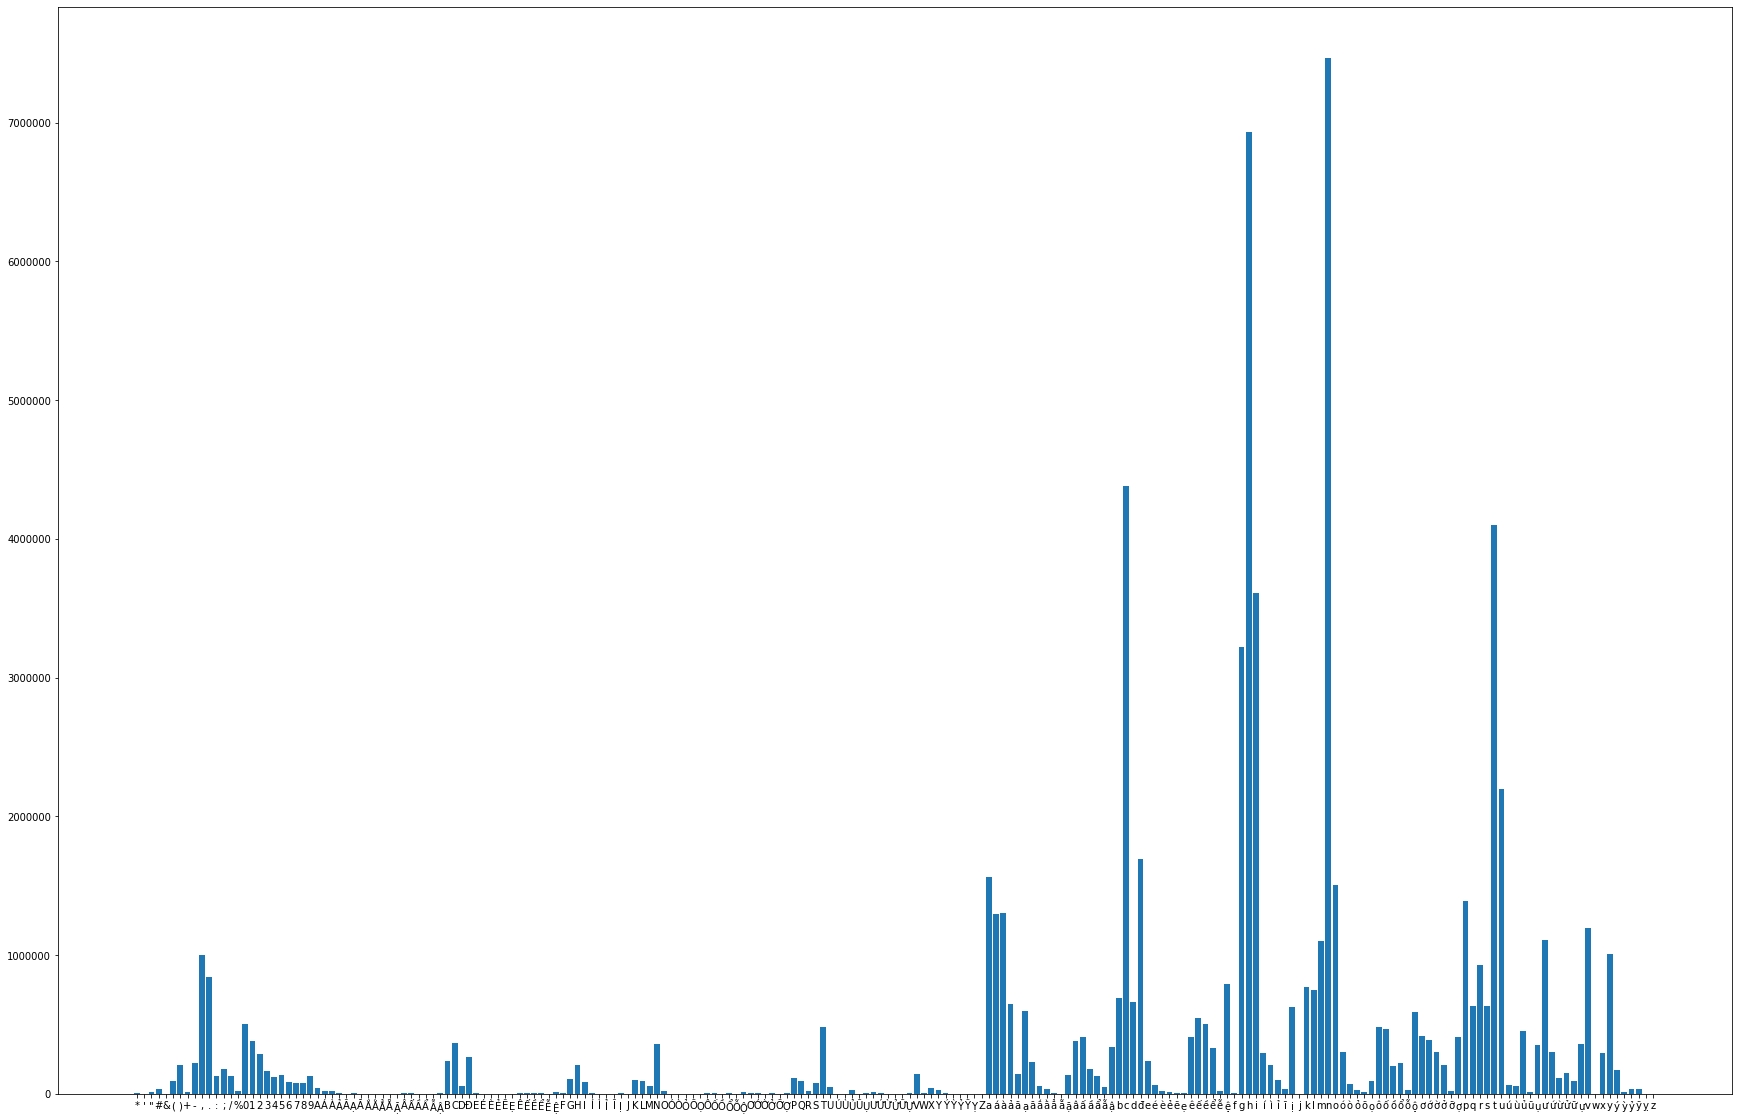

In [11]:
plot_char_freq(char_freq)

Now we need some condition to decide how to avoid class imbalance

In [12]:
print(char_freq)

{'*': 3316, "'": 1499, '"': 11213, '#': 38560, '&': 2581, '(': 89448, ')': 208278, '+': 11402, '-': 221946, ',': 1003683, '.': 844340, ':': 128146, ';': 180841, '/': 126606, '%': 17943, '0': 507070, '1': 378291, '2': 290607, '3': 168427, '4': 120419, '5': 132810, '6': 86578, '7': 76207, '8': 77084, '9': 130918, 'A': 40347, 'Á': 18045, 'À': 17328, 'Ả': 8399, 'Ã': 1658, 'Ạ': 8113, 'Ă': 2738, 'Ắ': 947, 'Ằ': 247, 'Ẳ': 54, 'Ẵ': 24, 'Ặ': 788, 'Â': 5029, 'Ấ': 5239, 'Ầ': 2006, 'Ẩ': 2063, 'Ẫ': 1013, 'Ậ': 4306, 'B': 235576, 'C': 368125, 'D': 53824, 'Đ': 263338, 'E': 9784, 'É': 914, 'È': 118, 'Ẻ': 252, 'Ẽ': 20, 'Ẹ': 67, 'Ê': 4656, 'Ế': 6995, 'Ề': 6476, 'Ể': 3909, 'Ễ': 345, 'Ệ': 11432, 'F': 3112, 'G': 104993, 'H': 208224, 'I': 89020, 'Í': 4782, 'Ì': 2168, 'Ỉ': 1196, 'Ĩ': 893, 'Ị': 5517, 'J': 626, 'K': 102872, 'L': 92367, 'M': 59062, 'N': 361119, 'O': 23601, 'Ó': 1774, 'Ò': 1186, 'Ỏ': 292, 'Õ': 311, 'Ọ': 1136, 'Ô': 7635, 'Ố': 6675, 'Ồ': 1721, 'Ổ': 3329, 'Ỗ': 309, 'Ộ': 11336, 'Ơ': 4833, 'Ớ': 4224, '

In [13]:
def get_need_boost_char(char_freq, freq_threshold = 10000):
    return [sample for sample in char_freq.items() if sample[1]<freq_threshold]

In [14]:
need_boost = get_need_boost_char(char_freq)
new_corpus = []
for char in tqdm(need_boost):
    for line in raw_corpus:
        if char[0] in line:
            new_corpus.append(line)
print(len(new_corpus))

100%|██████████| 77/77 [00:30<00:00,  2.59it/s]

186318


In [15]:
# plot_char_freq(count_char_freq(new_corpus))

In [16]:
np.median(list(count_char_freq(new_corpus).values()))

100%|██████████| 214/214 [00:01<00:00, 153.44it/s]


10475.0

In [17]:
need_boost = get_need_boost_char(count_char_freq(new_corpus), 5000)
sorted(need_boost, key=lambda x:x[1])

100%|██████████| 214/214 [00:01<00:00, 145.62it/s]


[('Ỵ', 39),
 ('Ẽ', 108),
 ('Ẵ', 128),
 ('Ẳ', 213),
 ('Ẹ', 327),
 ('õ', 350),
 ('ỵ', 389),
 ('j', 500),
 ('ỡ', 520),
 ('ũ', 533),
 ('è', 555),
 ('ỳ', 579),
 ('È', 601),
 ('ễ', 664),
 ('Ũ', 797),
 ('ĩ', 798),
 ('ỏ', 859),
 ('Õ', 887),
 ('Ỳ', 922),
 ('J', 1016),
 ('ỗ', 1083),
 ('+', 1087),
 ('ỹ', 1149),
 ('Z', 1172),
 ('ỷ', 1237),
 ('ẫ', 1241),
 ('"', 1399),
 ('ẻ', 1405),
 ('Ằ', 1417),
 ('Ẻ', 1422),
 ('Ỡ', 1522),
 ('%', 1547),
 ('ằ', 1551),
 ('Ỏ', 1711),
 ('ẵ', 1713),
 ("'", 1772),
 ('é', 1889),
 ('Ễ', 1921),
 ('ú', 1958),
 ('Ỗ', 2042),
 ('ò', 2104),
 ('ù', 2153),
 ('ắ', 2171),
 ('w', 2348),
 ('Ù', 2710),
 ('ẩ', 2734),
 ('ừ', 2896),
 ('&', 3057),
 ('z', 3073),
 ('ữ', 3175),
 ('ỉ', 3237),
 ('ẳ', 3240),
 ('Ừ', 3301),
 ('ã', 3600),
 ('ử', 3634),
 ('Ỷ', 3670),
 ('Ỹ', 3751),
 ('Ú', 3842),
 ('ý', 3956),
 ('ọ', 4017),
 ('*', 4111),
 ('Ặ', 4677),
 ('Ĩ', 4765),
 ('F', 4835),
 ('ồ', 4868),
 ('ổ', 4868),
 ('É', 4983)]

In [18]:
all_words = '\n'.join(raw_corpus).replace('\n', '.').split(' ')
all_words = list(set(all_words))
len(all_words)

874722

In [19]:
def create_word_dict_for_char(chars):
    word_dicts = {}
    for char in tqdm(chars):
        word_dicts[char] = []
        for word in all_words:
            if char in word:
                word_dicts[char].append(word)
    return word_dicts

In [20]:
def get_word(char):
    return random.sample(word_dicts[char], 1)[0]

def create_random_string(char_list):
    out_words = []
    max_length_in_word = random.randint(4, 10)
    if len(char_list) > max_length_in_word:
        char_list = random.sample(char_list, max_length_in_word)
    for each in char_list:
        word = get_word(each)
        if random.uniform(0,1) < 0.005:
            for j, char in enumerate(word):
                if char != each:
                    word[j] = str(word[:j+1]) + str(random.sample(char_list, 1)[0]) + str(word[j+1:])
                    break
        out_words.append(word)
    return ' '.join(out_words)

In [21]:
vn_char = ['A', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'B', 'C', 'D', 'Đ', 'E', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'F', 'G', 'H', 'I', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'J', 'K', 'L', 'M', 'N', 'O', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'P', 'Q', 'R', 'S', 'T', 'U', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'V', 'W', 'X', 'Y', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Z', 'a', 'á', 'à', 'ả', 'ã', 'ạ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'b', 'c', 'd', 'đ', 'e', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'f', 'g', 'h', 'i', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'j', 'k', 'l', 'm', 'n', 'o', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'p', 'q', 'r', 's', 't', 'u', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'v', 'w', 'x', 'y', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'z']
need_boost_char = [char[0] for char in need_boost if char[0] in vn_char]
print(need_boost_char)

['Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ễ', 'F', 'Ĩ', 'J', 'Ỏ', 'Õ', 'Ỗ', 'Ỡ', 'Ú', 'Ù', 'Ũ', 'Ừ', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Z', 'ã', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ẩ', 'ẫ', 'é', 'è', 'ẻ', 'ễ', 'ỉ', 'ĩ', 'j', 'ò', 'ỏ', 'õ', 'ọ', 'ồ', 'ổ', 'ỗ', 'ỡ', 'ú', 'ù', 'ũ', 'ừ', 'ử', 'ữ', 'w', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'z']


In [22]:
word_dicts = create_word_dict_for_char(need_boost_char)

100%|██████████| 61/61 [00:12<00:00,  4.83it/s]


In [23]:
create_random_string(need_boost_char)

'xử.16.061.145.920 Nẵng..1. (CHÈ.d) dẫn.phạt DỤNG.tỉnh, Tổ.Cơ TẾ-UỶ.được hằng.11. Tùy.hướng'

In [24]:
def meh(x=1):
    try:
        return create_random_string(need_boost_char)
    except:
        return None

In [25]:
num_generate=500000-len(new_corpus)
num_generate

313682

In [26]:
import multiprocessing
pool = multiprocessing.Pool(8)
randomized_string = list(tqdm(pool.imap(meh, range(num_generate)),
              total=num_generate, desc="Generating"))
pool.terminate()

Generating: 100%|██████████| 313682/313682 [00:18<00:00, 16531.77it/s]


In [27]:
randomized_string = [each for each in randomized_string if each is not None]

100%|██████████| 214/214 [00:04<00:00, 45.15it/s]


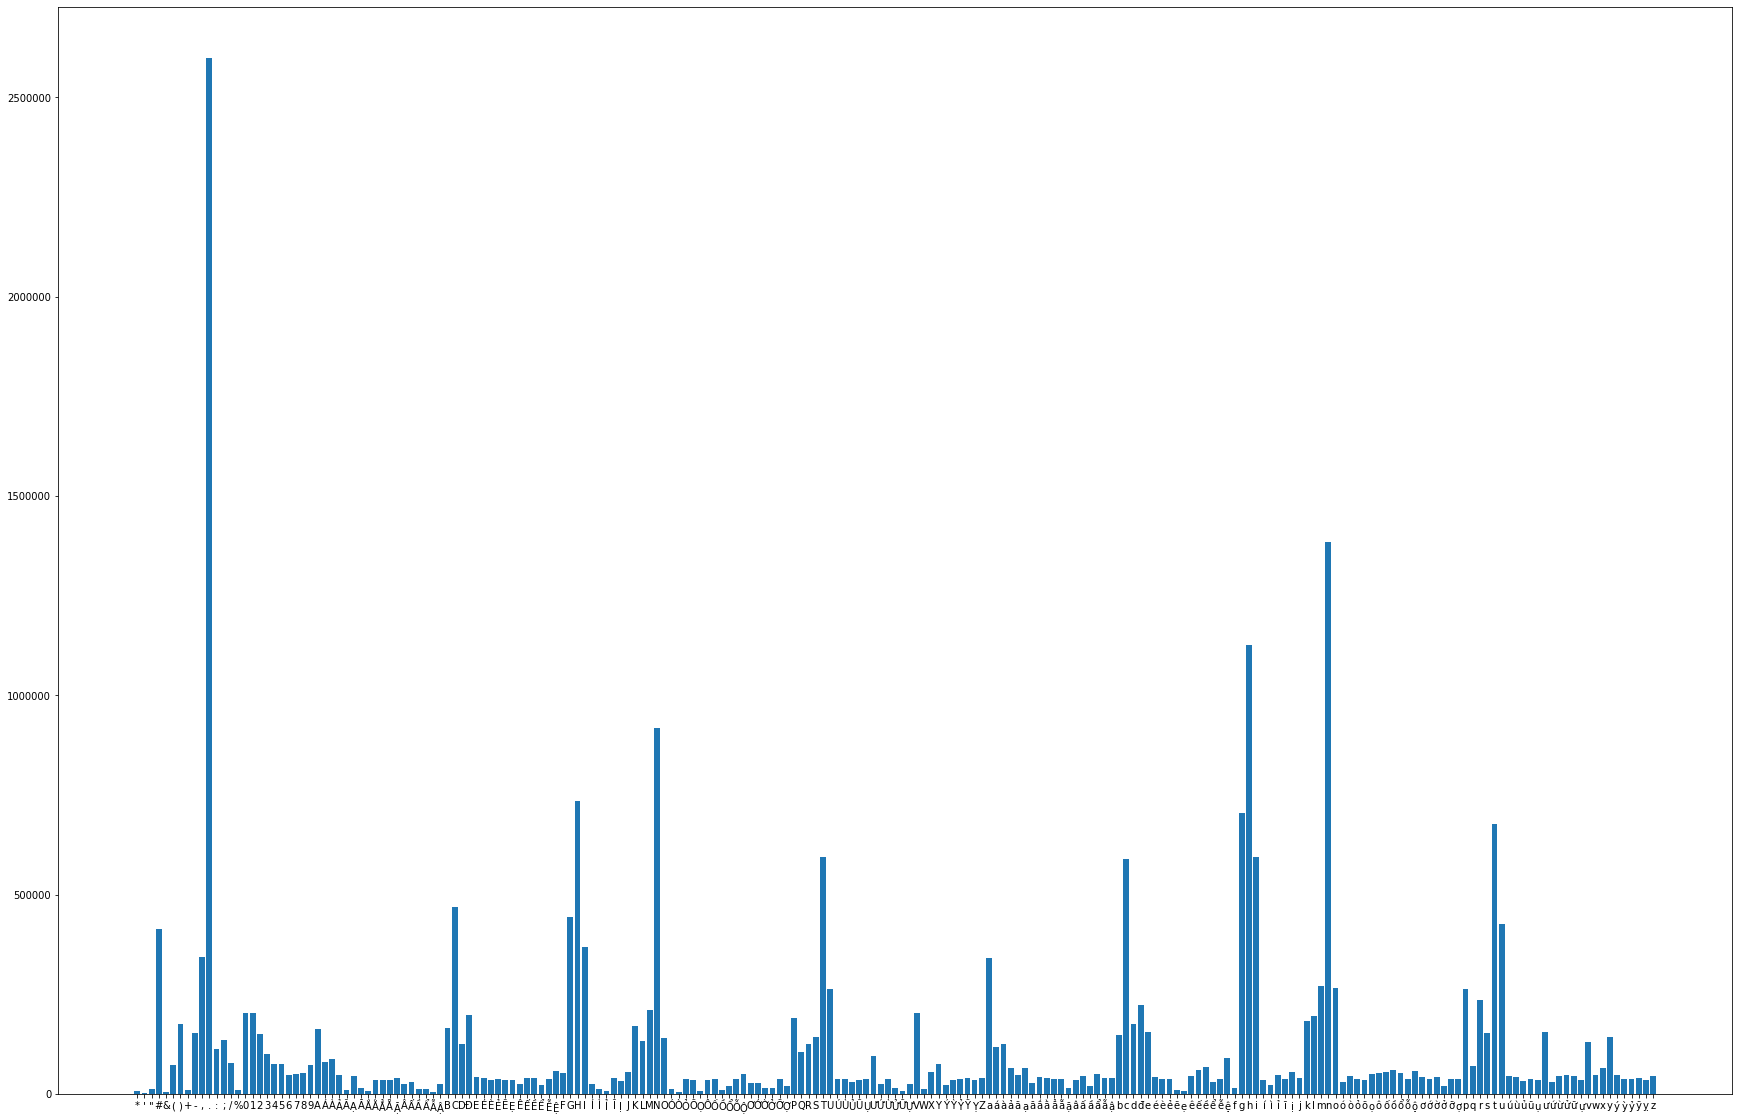

In [28]:
plot_char_freq(count_char_freq(randomized_string+new_corpus))

In [29]:
need_boost = get_need_boost_char(count_char_freq(randomized_string+new_corpus), 5000)
need_boost

100%|██████████| 214/214 [00:04<00:00, 44.34it/s]


[("'", 3465), ('&', 4674)]

In [30]:
with open('fixed_corpus.txt', 'w') as f:
    for item in (randomized_string+new_corpus):
        f.write("%s\n" % item)